In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

condition_path = "/Users/tudor/Desktop/UNI/FS-23/Intro to Data Science/Project/data/condition" # use your path
condition_files = glob.glob(os.path.join(condition_path , "*.csv"))

li = []

for filename in condition_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df["ID"] = condition_files.index(filename)+1
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,timestamp,date,activity,ID
0,2002-06-06 13:00:00,2002-06-06,161,1
1,2002-06-06 13:01:00,2002-06-06,80,1
2,2002-06-06 13:02:00,2002-06-06,175,1
3,2002-06-06 13:03:00,2002-06-06,728,1
4,2002-06-06 13:04:00,2002-06-06,911,1


In [3]:
df = frame.pivot(index='timestamp', columns='ID', values='activity')

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import seaborn as sns 

%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

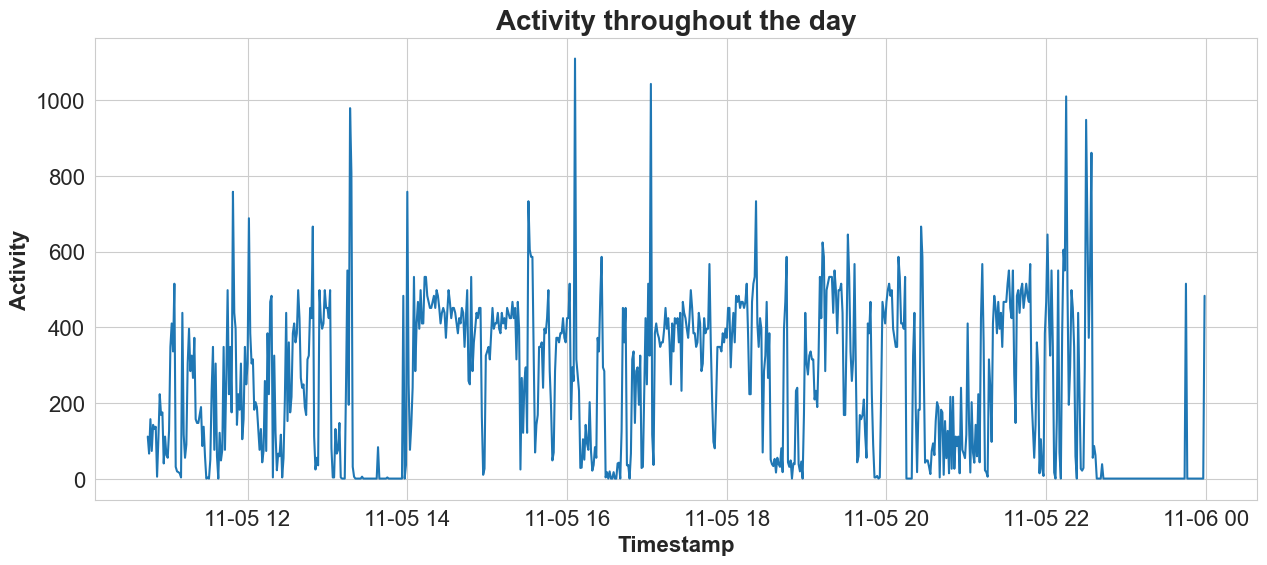

In [40]:
## For ID 2 on the 5th of November:

frame['timestamp'] = pd.to_datetime(frame['timestamp'])
frame['year'] = frame['timestamp'].dt.year
frame['month'] = frame['timestamp'].dt.month
frame['day'] = frame['timestamp'].dt.day
d = frame[frame['ID']==2]
d = d[d["year"] == 2002] 
d = d[d["month"] == 11] 
d = d[d["day"] == 5]

fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(x = d['timestamp'], y = d['activity'] )

ax.set_title('Activity throughout the day', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Timestamp', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Activity', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)




Text(0, 0.5, 'Activity')

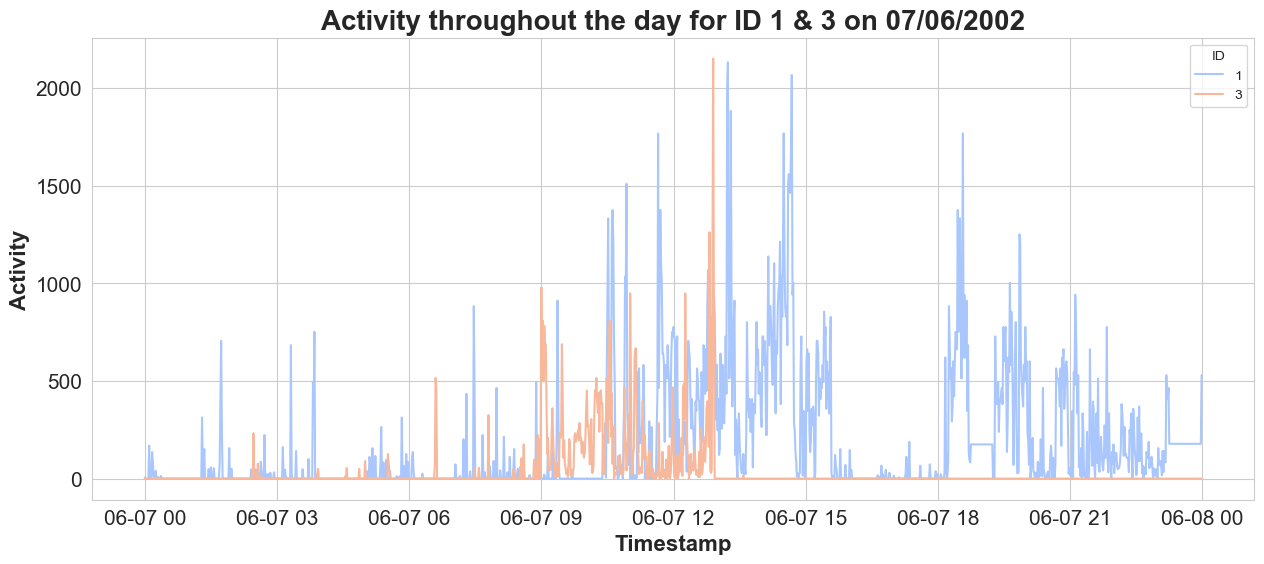

In [90]:
variable = 'activity'

d = frame[frame['month']==6]
d = d[d["year"] == 2002] 
d = d[d["day"] == 7]


fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette('coolwarm', n_colors=2)
sns.lineplot(x = d['timestamp'], y = d[variable], hue=d['ID'], palette=palette)
ax.set_title('Activity throughout the day for ID 1 & 3 on 07/06/2002', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Timestamp', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Activity', fontsize = 16, fontdict=dict(weight='bold'))
